In [1]:
import os, shutil
import time
import datetime
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping
from keras import layers
from keras import models
from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [5]:
model = load_model('25467.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 252, 252, 32)      9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 126, 126, 32)      0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 124, 124, 64)      18496     
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 122, 122, 64)      36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 61, 61, 64)        0         
__________

In [7]:
model.load_weights('weights.val_acc_27845.hdf5')

(1, 256, 256, 3)


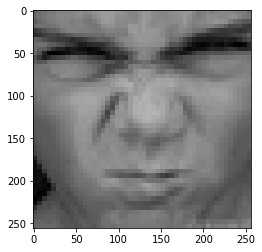

In [11]:
img_path = 'fer2013/Training/0/Training_1377529.jpg'

img = image.load_img(img_path, target_size=(256, 256))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

#Follow the Original Model Preprocessing
img_tensor /= 255.

#Check tensor shape
print(img_tensor.shape)

#Preview an image
plt.imshow(img_tensor[0])
plt.show()

In [12]:
# Extract model layer outputs
layer_outputs = [layer.output for layer in model.layers[:8]]

# Rather then a model with a single output, we are going to make a model to display the feature maps
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

(1, 254, 254, 32)


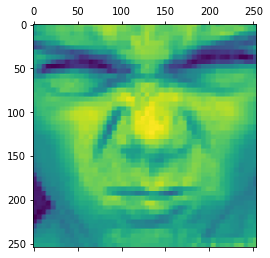

In [17]:
# Returns an array for each activation layer
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

#We slice the third channel and preview the results
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

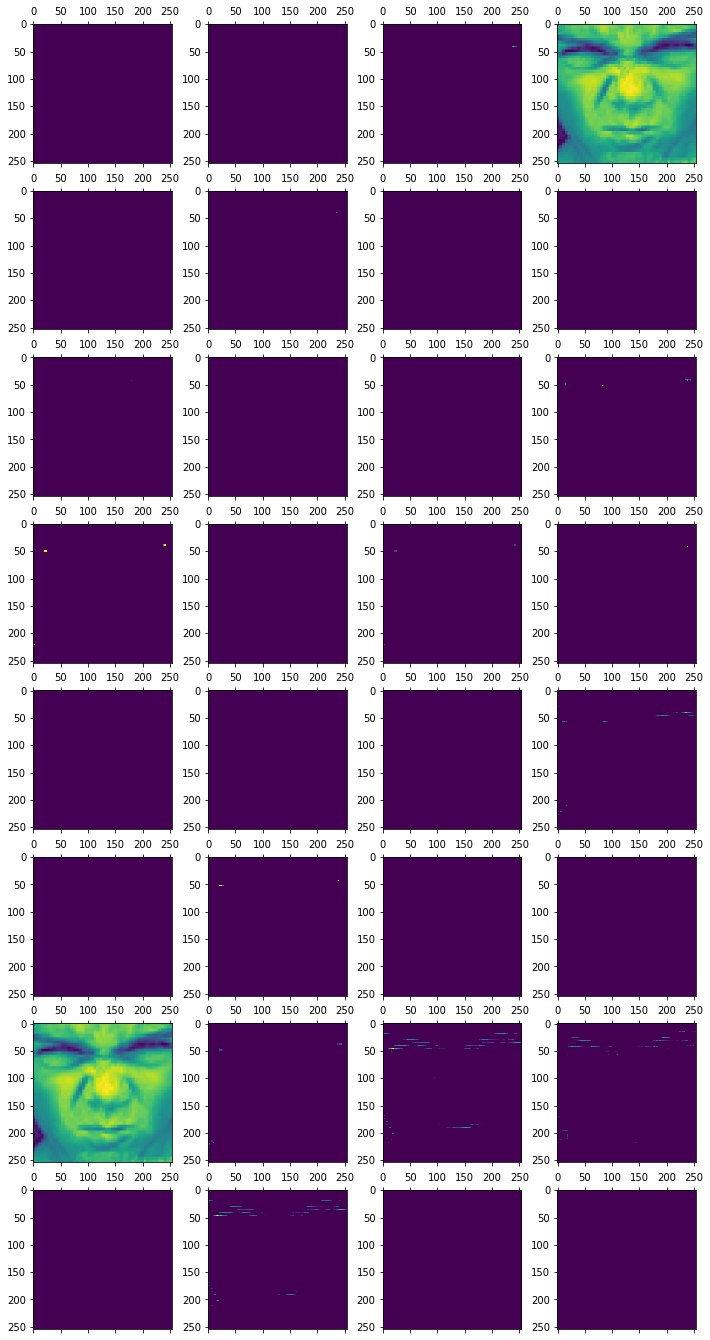

In [22]:
fig, axes = plt.subplots(8, 4, figsize=(12,24))
for i in range(32):
    row = i//4
    column = i%4
    ax = axes[row, column]
    first_layer_activation = activations[0]
    ax.matshow(first_layer_activation[0, :, :, i], cmap='viridis')

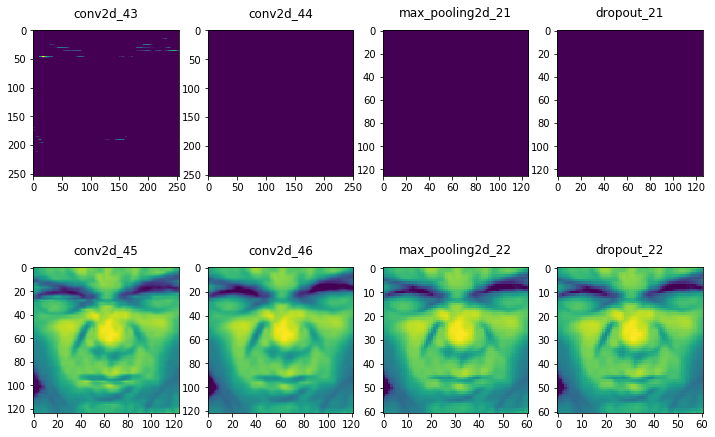

In [24]:
fig, axes = plt.subplots(2,4, figsize=(12,8))

layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

for i in range(8):
    row = i//4
    column = i%4
    ax = axes[row, column]
    cur_layer = activations[i]
    ax.matshow(cur_layer[0, :, :, 29], cmap='viridis')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_title(layer_names[i])

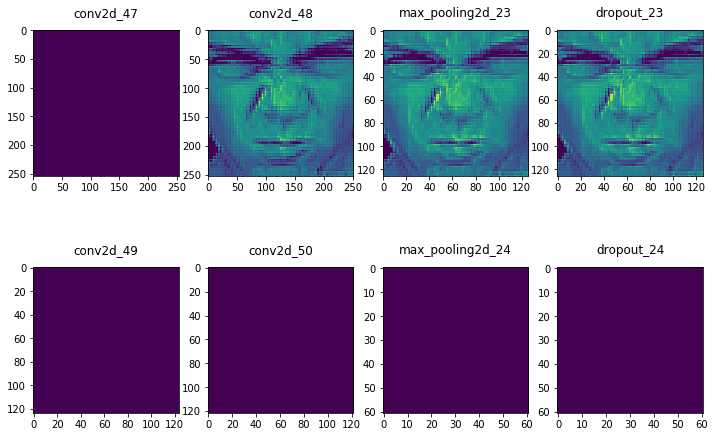

In [34]:
fig, axes = plt.subplots(2,4, figsize=(12,8))

layer_names = []
for layer in model.layers[8:16]:
    layer_names.append(layer.name)

for i in range(8):
    row = i//4
    column = i%4
    ax = axes[row, column]
    cur_layer = activations[i]
    ax.matshow(cur_layer[0, :, :, 1], cmap='viridis')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_title(layer_names[i])

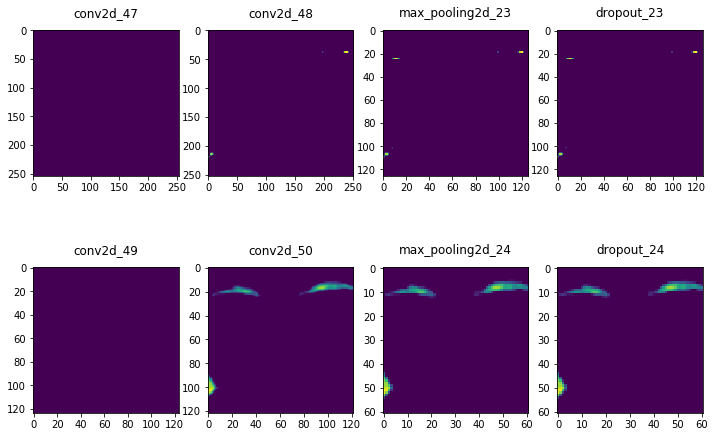

In [40]:
fig, axes = plt.subplots(2,4, figsize=(12,8))

layer_names = []
for layer in model.layers[8:16]:
    layer_names.append(layer.name)

for i in range(8):
    row = i//4
    column = i%4
    ax = axes[row, column]
    cur_layer = activations[i]
    ax.matshow(cur_layer[0, :, :, 10], cmap='viridis')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_title(layer_names[i])

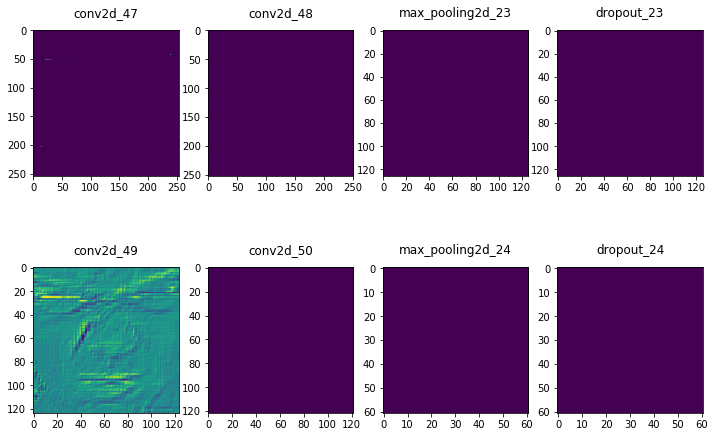

In [41]:
fig, axes = plt.subplots(2,4, figsize=(12,8))

layer_names = []
for layer in model.layers[8:16]:
    layer_names.append(layer.name)

for i in range(8):
    row = i//4
    column = i%4
    ax = axes[row, column]
    cur_layer = activations[i]
    ax.matshow(cur_layer[0, :, :, 11], cmap='viridis')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_title(layer_names[i])

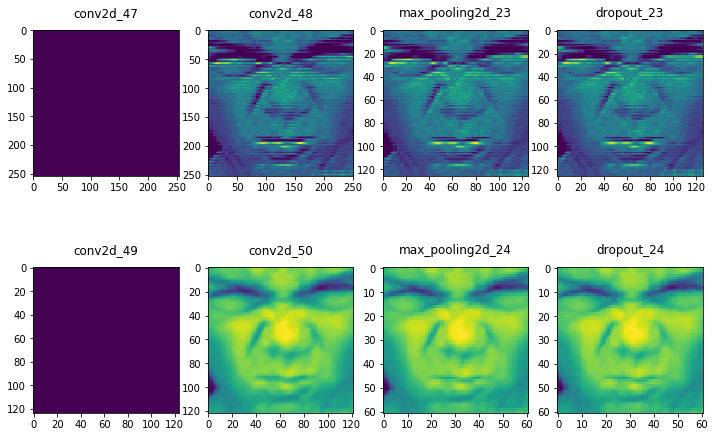

In [53]:
fig, axes = plt.subplots(2,4, figsize=(12,8))

layer_names = []
for layer in model.layers[8:16]:
    layer_names.append(layer.name)

for i in range(8):
    row = i//4
    column = i%4
    ax = axes[row, column]
    cur_layer = activations[i]
    ax.matshow(cur_layer[0, :, :, 23], cmap='viridis')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_title(layer_names[i])

Data Augmentation

In [74]:
train_dir = 'fer2013/Training'
train_angry = 'fer2013/Training/0'
validation_dir = 'fer2013/Validation/'
test_dir = 'fer2013/Test'

In [96]:
# train_datagen= ImageDataGenerator(rescale=1./255, 
#      rotation_range=40,
#      width_shift_range=0.2,
#      height_shift_range=0.2,
#      shear_range=0.3,
#      zoom_range=0.1,
#      horizontal_flip = True,
#      )

train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

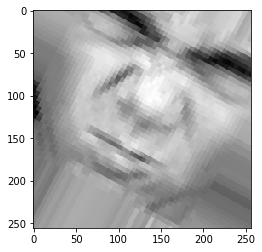

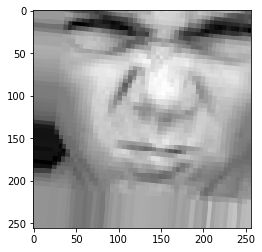

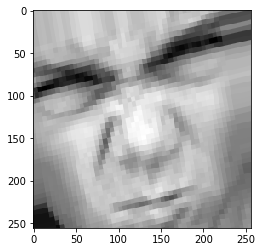

In [97]:
# names = [os.path.join(train_angry, name) for name in os.listdir(train_angry)]

# img_path = names[1]
img_path = 'fer2013/Training/0/Training_1377529.jpg'
img = load_img(img_path, target_size=(256, 256))

reshape_img = img_to_array(img) 
reshape_img = reshape_img.reshape((1,) + reshape_img.shape) 
i=0
for batch in train_datagen.flow(reshape_img, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 3 == 0:
        break
plt.show()

(1, 256, 256, 3)


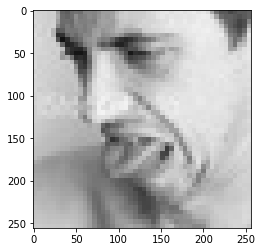

In [103]:
img_path = 'fer2013/Training/1/Training_46212893.jpg'

img = image.load_img(img_path, target_size=(256, 256))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

#Follow the Original Model Preprocessing
img_tensor /= 255.

#Check tensor shape
print(img_tensor.shape)

#Preview an image
plt.imshow(img_tensor[0])
plt.show()

(1, 254, 254, 32)


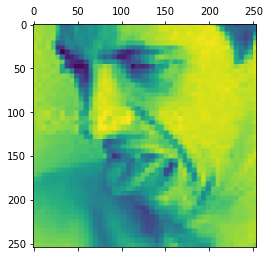

In [105]:
# Extract model layer outputs
layer_outputs = [layer.output for layer in model.layers[:8]]

# Rather then a model with a single output, we are going to make a model to display the feature maps
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# Returns an array for each activation layer
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

#We slice the third channel and preview the results
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

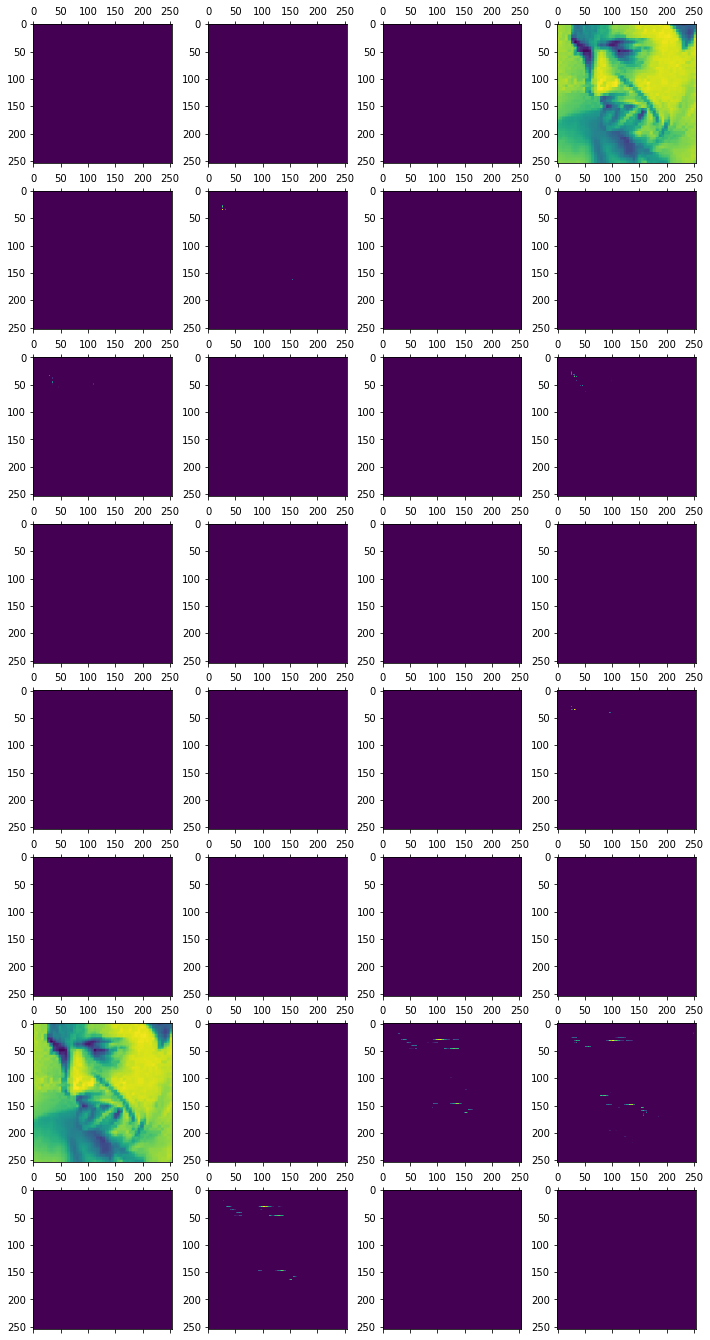

In [106]:
fig, axes = plt.subplots(8, 4, figsize=(12,24))
for i in range(32):
    row = i//4
    column = i%4
    ax = axes[row, column]
    first_layer_activation = activations[0]
    ax.matshow(first_layer_activation[0, :, :, i], cmap='viridis')

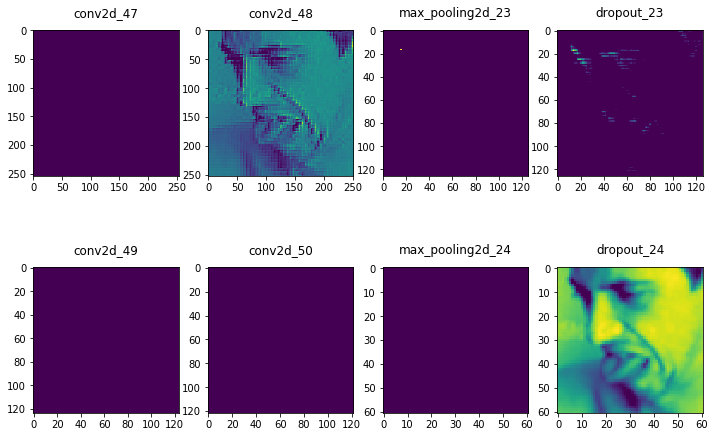

In [116]:
fig, axes = plt.subplots(2,4, figsize=(12,8))

layer_names = []
for layer in model.layers[8:16]:
    layer_names.append(layer.name)

for i in range(8):
    row = i//4
    column = i%4
    ax = axes[row, column]
    cur_layer = activations[i]
    ax.matshow(cur_layer[0, :, :, i], cmap='viridis')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_title(layer_names[i])

(1, 256, 256, 3)


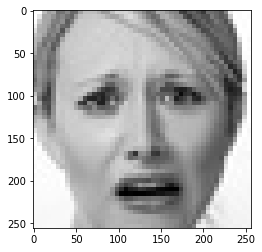

In [117]:
#Fear


img_path = 'fer2013/Training/2/Training_9363180.jpg'

img = image.load_img(img_path, target_size=(256, 256))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

#Follow the Original Model Preprocessing
img_tensor /= 255.

#Check tensor shape
print(img_tensor.shape)

#Preview an image
plt.imshow(img_tensor[0])
plt.show()

(1, 256, 256, 3)


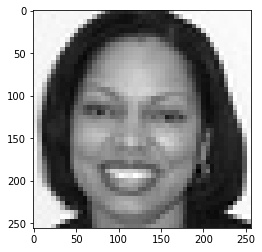

In [118]:
#HAPPY

img_path = 'fer2013/Training/3/Training_7456308.jpg'

img = image.load_img(img_path, target_size=(256, 256))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

#Follow the Original Model Preprocessing
img_tensor /= 255.

#Check tensor shape
print(img_tensor.shape)

#Preview an image
plt.imshow(img_tensor[0])
plt.show()

(1, 256, 256, 3)


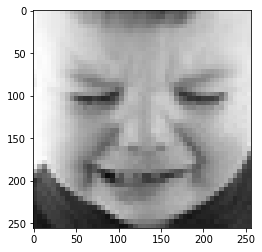

In [120]:
#SAD

img_path = 'fer2013/Training/4/Training_152840.jpg'

img = image.load_img(img_path, target_size=(256, 256))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

#Follow the Original Model Preprocessing
img_tensor /= 255.

#Check tensor shape
print(img_tensor.shape)

#Preview an image
plt.imshow(img_tensor[0])
plt.show()

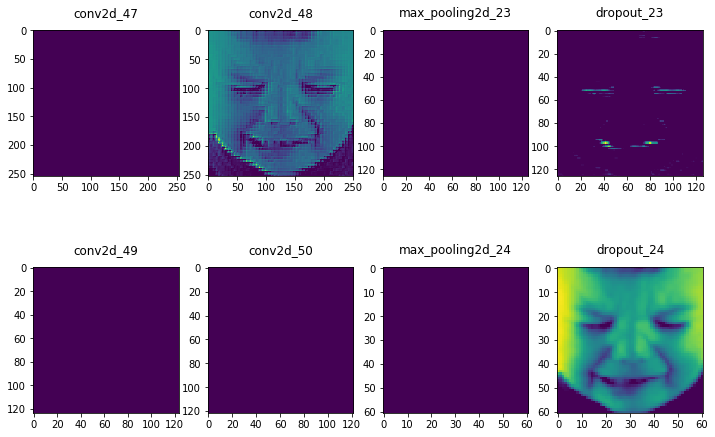

In [123]:
fig, axes = plt.subplots(2,4, figsize=(12,8))

layer_names = []
for layer in model.layers[8:16]:
    layer_names.append(layer.name)

for i in range(8):
    row = i//4
    column = i%4
    ax = axes[row, column]
    cur_layer = activations[i]
    ax.matshow(cur_layer[0, :, :, i], cmap='viridis')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_title(layer_names[i])

(1, 256, 256, 3)


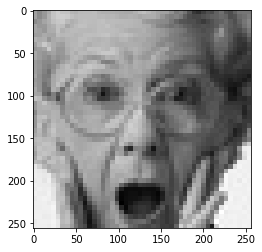

In [125]:
#SURPRISE

img_path = 'fer2013/Training/5/Training_1490586.jpg'

img = image.load_img(img_path, target_size=(256, 256))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

#Follow the Original Model Preprocessing
img_tensor /= 255.

#Check tensor shape
print(img_tensor.shape)

#Preview an image
plt.imshow(img_tensor[0])
plt.show()

(1, 254, 254, 32)


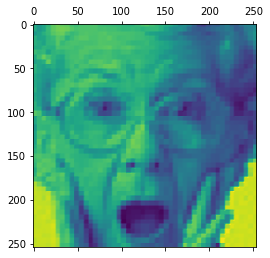

In [126]:
# Extract model layer outputs
layer_outputs = [layer.output for layer in model.layers[:8]]

# Rather then a model with a single output, we are going to make a model to display the feature maps
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# Returns an array for each activation layer
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

#We slice the third channel and preview the results
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

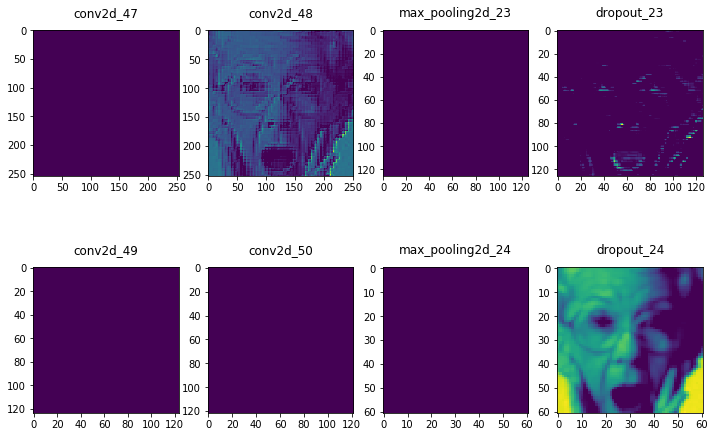

In [128]:
fig, axes = plt.subplots(2,4, figsize=(12,8))

layer_names = []
for layer in model.layers[8:16]:
    layer_names.append(layer.name)

for i in range(8):
    row = i//4
    column = i%4
    ax = axes[row, column]
    cur_layer = activations[i]
    ax.matshow(cur_layer[0, :, :, i], cmap='viridis')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_title(layer_names[i])

(1, 256, 256, 3)


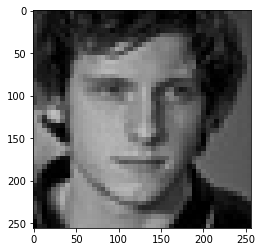

In [129]:
#NEUTRAL

img_path = 'fer2013/Training/6/Training_10575412.jpg'

img = image.load_img(img_path, target_size=(256, 256))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

#Follow the Original Model Preprocessing
img_tensor /= 255.

#Check tensor shape
print(img_tensor.shape)

#Preview an image
plt.imshow(img_tensor[0])
plt.show()

## More EDA

In [7]:
model = load_model('transfer_learning_unfreeze_6127.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [3]:
train_dir = 'fer2013/Training'
validation_dir = 'fer2013/Validation/'
test_dir = 'fer2013/Test'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(200, 200),
#         batch_size=28709,
        batch_size=200,
        class_mode='categorical')


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(200,200),
#         batch_size=3589,
        batch_size=200,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200,200),
#         batch_size=3589,
        batch_size=200,
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 1 classes.
Found 3589 images belonging to 7 classes.


In [4]:
train_set = train_datagen.flow_from_directory(
        train_dir,
        target_size=(200,200),
        batch_size=28709,
        class_mode='categorical')
test_set = test_datagen.flow_from_directory(
        test_dir,
        target_size=(200,200),
        batch_size=3589,
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 1 classes.


In [5]:
train_set.class_indices

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6}

In [6]:
labels=(train_set.class_indices)
labels

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6}

In [7]:
labels = dict((v,k) for k,v in labels.items())
labels

{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6'}

# Training Set Distribution

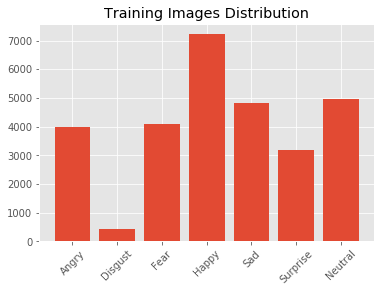

In [11]:
emotions=labels.values()

count_values = [] 
for e in emotions:
    count_values.append(len(os.listdir('fer2013/Training'+'/'+e)))
    
plt.style.use("ggplot")
plt.bar(emotions,count_values)
plt.title('Training Images Distribution')
plt.xticks(np.arange(7), ('Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'), rotation=45)
plt.show()
# print('Angry, Disgust, Fear, Happy, Sad, Surprise, Neutral')

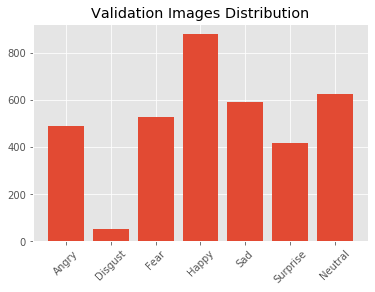

In [13]:
emotions=labels.values()

count_values = [] 
for e in emotions:
    count_values.append(len(os.listdir('fer2013/Validation'+'/'+e)))
    
plt.style.use("ggplot")
plt.bar(emotions,count_values)
plt.title('Validation Images Distribution')
plt.xticks(np.arange(7), ('Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'), rotation=45)
plt.show()


# New Model

In [3]:
model = load_model('66412.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


(1, 150, 150, 3)


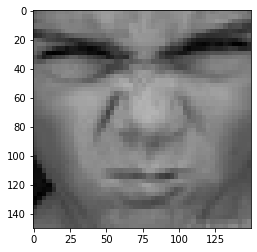

In [6]:
img_path = 'fer2013/Training/0/Training_1377529.jpg'

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

#Follow the Original Model Preprocessing
img_tensor /= 255.

#Check tensor shape
print(img_tensor.shape)

#Preview an image
plt.imshow(img_tensor[0])
plt.show()

(1, 148, 148, 64)


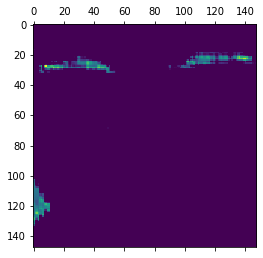

In [7]:
# Extract model layer outputs
layer_outputs = [layer.output for layer in model.layers[:8]]

# Rather then a model with a single output, we are going to make a model to display the feature maps
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# Returns an array for each activation layer
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[0]
print(first_layer_activation.shape)

#We slice the third channel and preview the results
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')
plt.show()

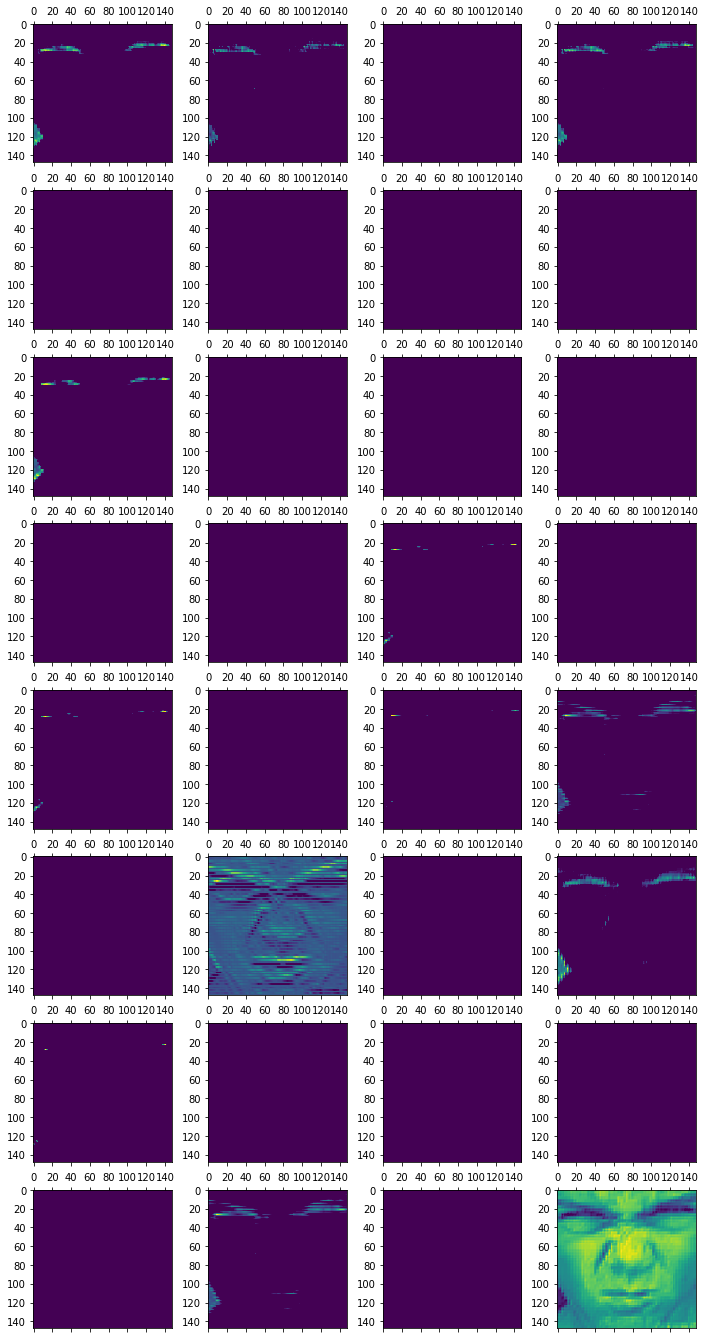

In [8]:
fig, axes = plt.subplots(8, 4, figsize=(12,24))
for i in range(32):
    row = i//4
    column = i%4
    ax = axes[row, column]
    first_layer_activation = activations[0]
    ax.matshow(first_layer_activation[0, :, :, i], cmap='viridis')

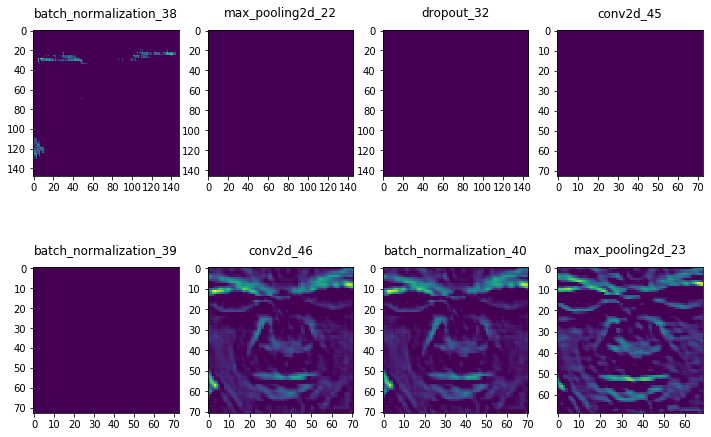

In [9]:
fig, axes = plt.subplots(2,4, figsize=(12,8))

layer_names = []
for layer in model.layers[8:16]:
    layer_names.append(layer.name)

for i in range(8):
    row = i//4
    column = i%4
    ax = axes[row, column]
    cur_layer = activations[i]
    ax.matshow(cur_layer[0, :, :, 1], cmap='viridis')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_title(layer_names[i])

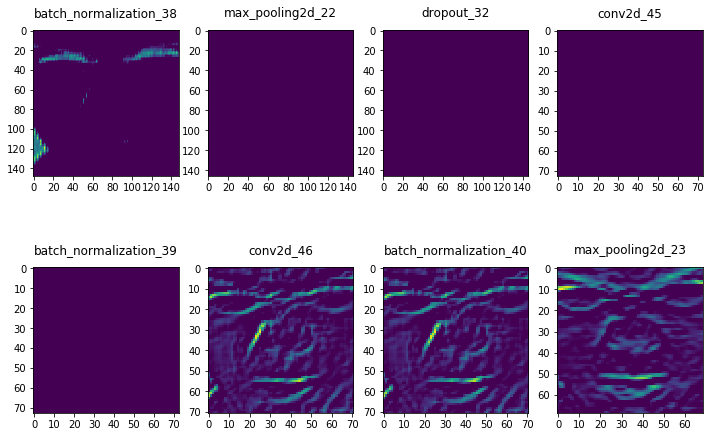

In [10]:
fig, axes = plt.subplots(2,4, figsize=(12,8))

layer_names = []
for layer in model.layers[8:16]:
    layer_names.append(layer.name)

for i in range(8):
    row = i//4
    column = i%4
    ax = axes[row, column]
    cur_layer = activations[i]
    ax.matshow(cur_layer[0, :, :, 23], cmap='viridis')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_title(layer_names[i])

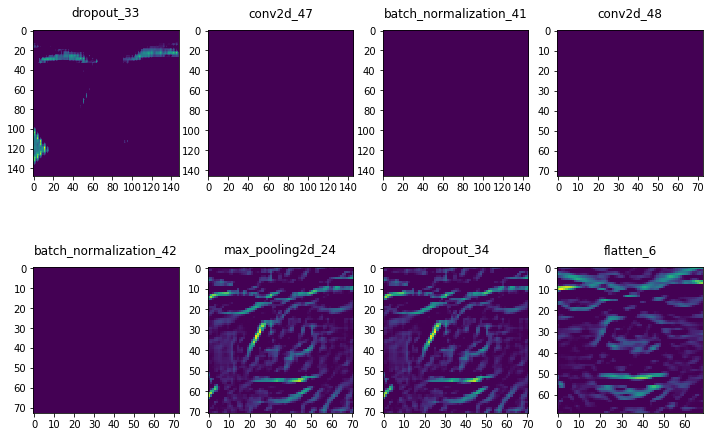

In [12]:
fig, axes = plt.subplots(2,4, figsize=(12,8))

layer_names = []
for layer in model.layers[16:32]:
    layer_names.append(layer.name)

for i in range(8):
    row = i//4
    column = i%4
    ax = axes[row, column]
    cur_layer = activations[i]
    ax.matshow(cur_layer[0, :, :, 23], cmap='viridis')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_title(layer_names[i])